In [1]:
import libs_cleo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

# 确保 Matplotlib 图表正确显示在 Jupyter 中
%matplotlib inline

In [2]:
path_s1 = r"G:\0_postgraduate\DMSP\data\2011\15s1\dms_20110101_15s1.001.nc"
file_s1 = libs_cleo.NcFile(path_s1)
data_s1 = file_s1.original_data
file_path = r"G:\0_postgraduate\DMSP\data\cdf\dmsp-f18_ssies-3_thermal-plasma_201101010021_v01.cdf"
# disgard_vars = ['corrpaqual','ebm','rpainfo','nmbot','rpaground','pot','corvelx','corvely','corvelz']
file_cdf = libs_cleo.CDFFile(file_path)
data_ssies3 = file_cdf.data
vxraw_set_nan = file_cdf.vxraw_quality_control()

<Axes: >

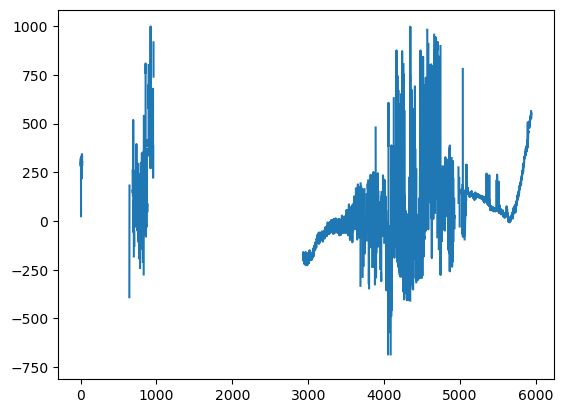

In [3]:
vxraw_set_nan.plot()

In [4]:
start_idx,end_idx = file_cdf.return_start_end_idx()

In [5]:
data = libs_cleo.walen_test_s1_sseis3(data_s1=data_s1,data_ssies3=data_ssies3,start_idx=start_idx,end_idx=end_idx,vxraw_set_nan=vxraw_set_nan)
data['vx'] = data['vx'].interpolate(method='linear')
data['diff_bx'] = data['diff_bx'].interpolate(method='linear')

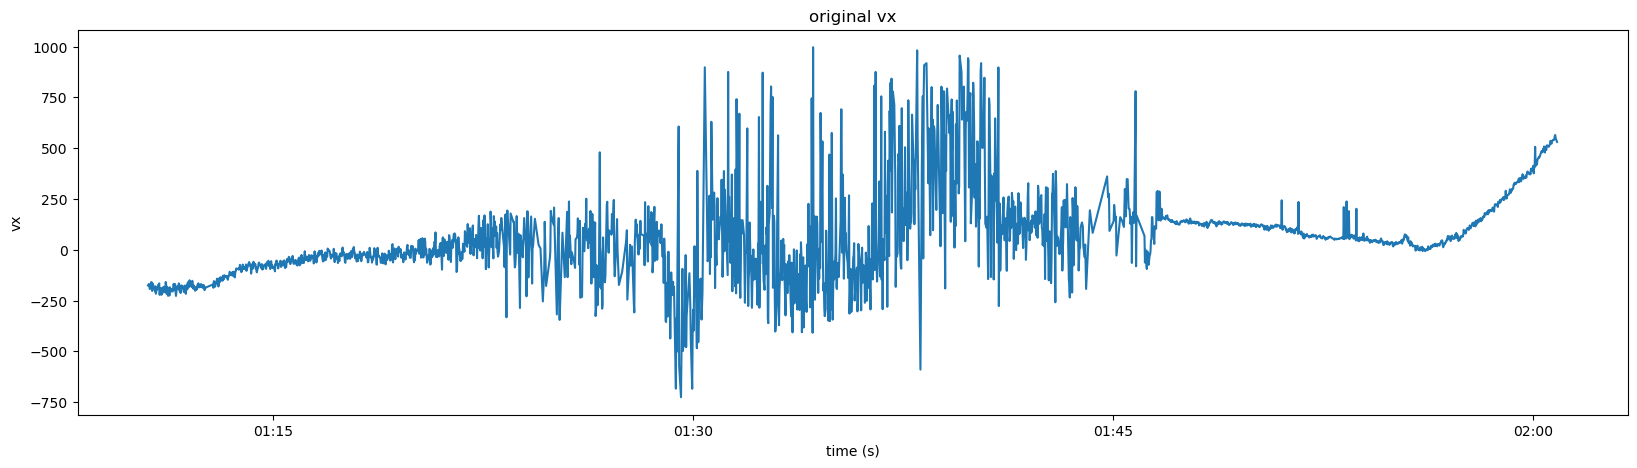

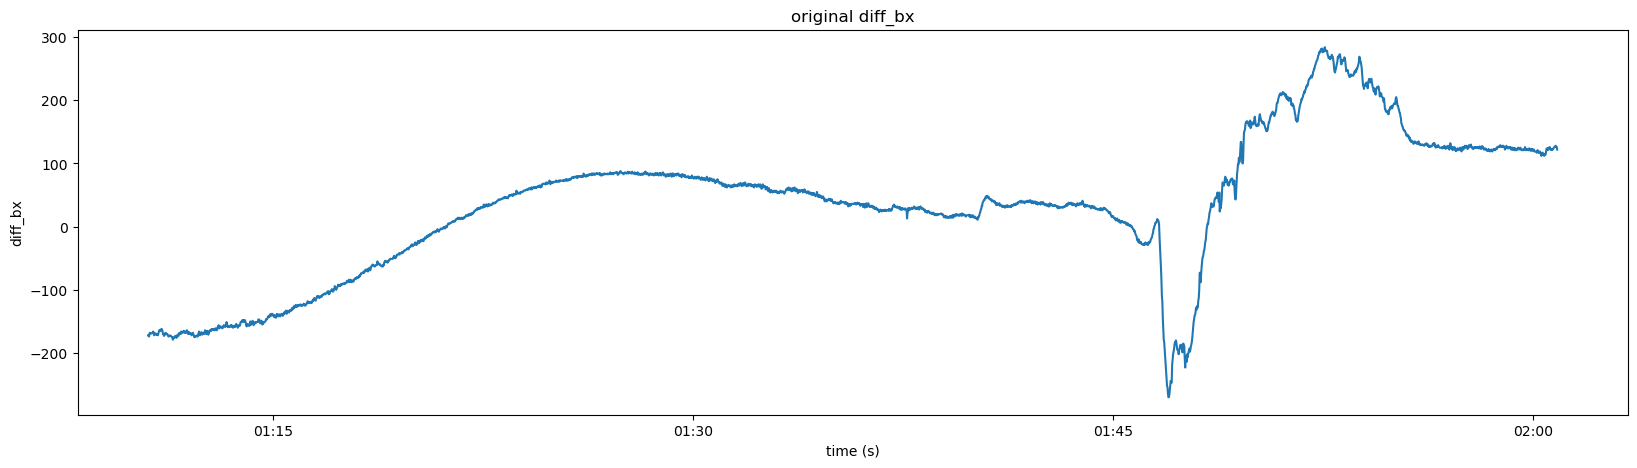

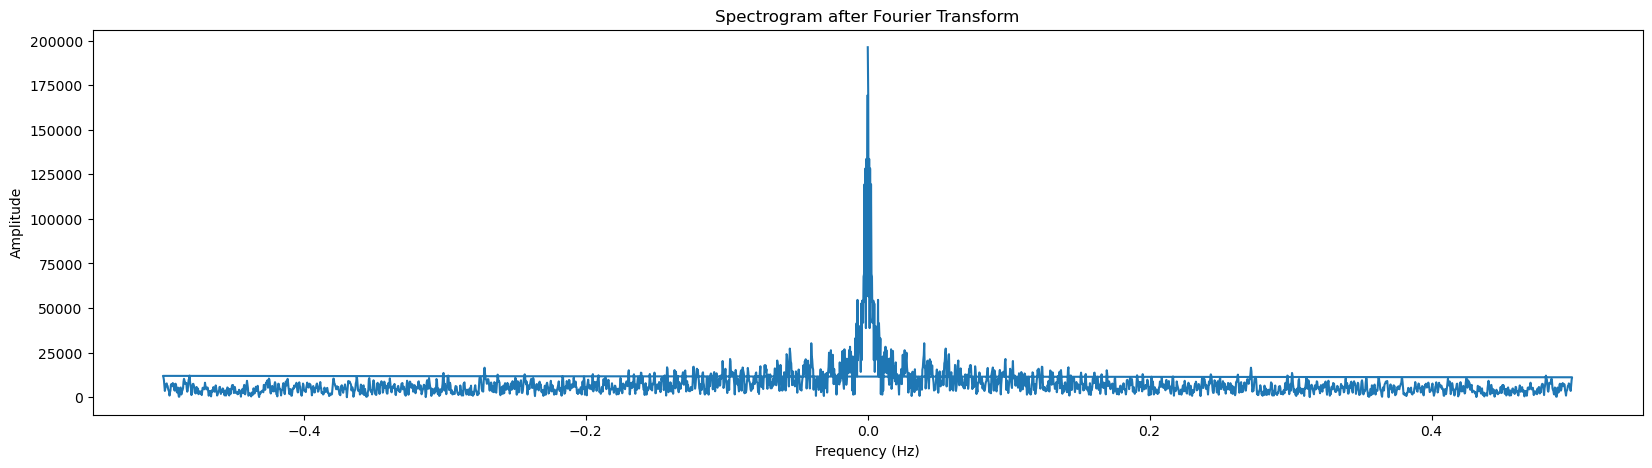

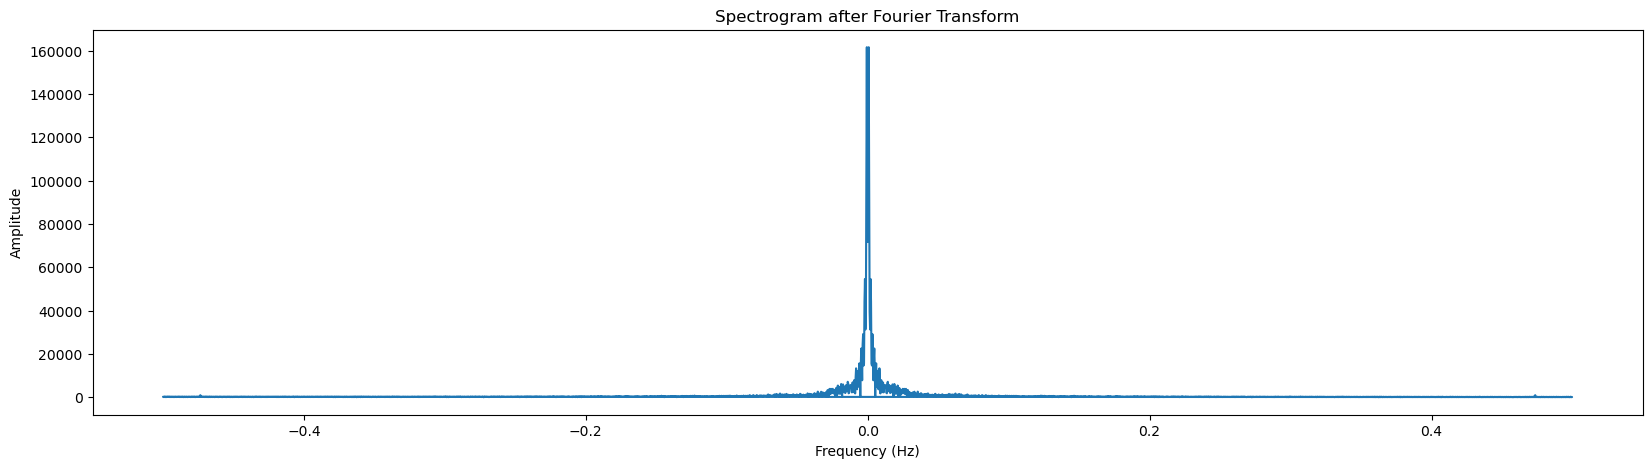

In [6]:
filter_vx = libs_cleo.BandPassFilter(data['vx'],data['Epoch'])
filter_diff_bx = libs_cleo.BandPassFilter(data['diff_bx'],data['Epoch'])

fig1 = filter_vx.draw_original_signal()
fig2 = filter_diff_bx.draw_original_signal()
fig3 = filter_vx.draw_frequency_amplitude()
fig4 = filter_diff_bx.draw_frequency_amplitude()

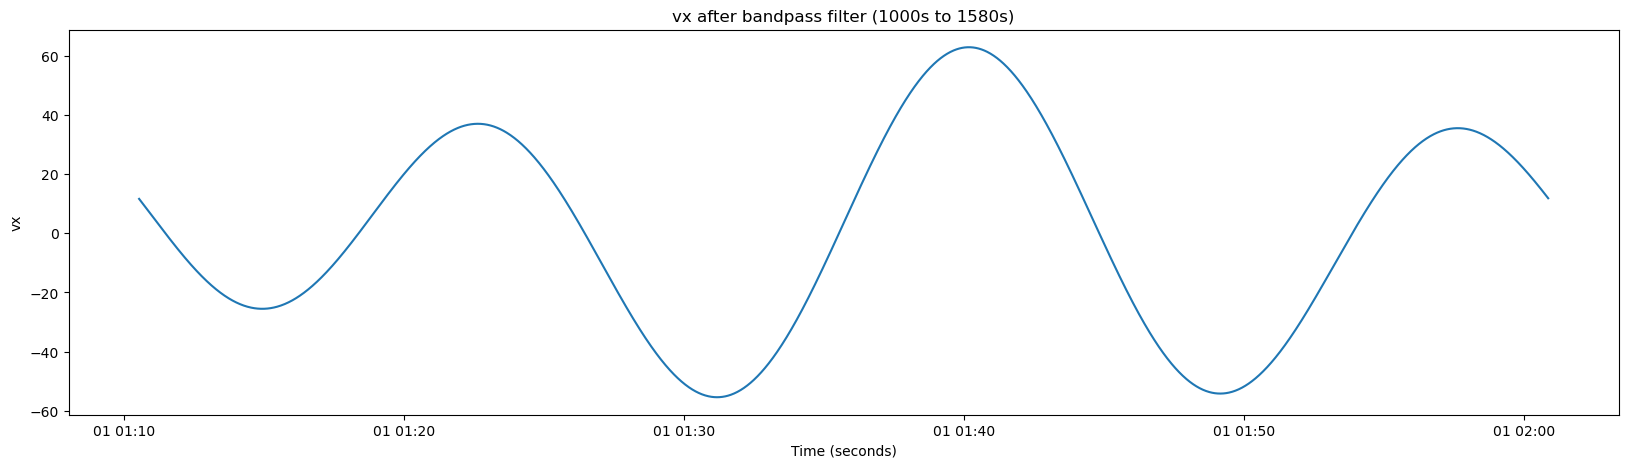

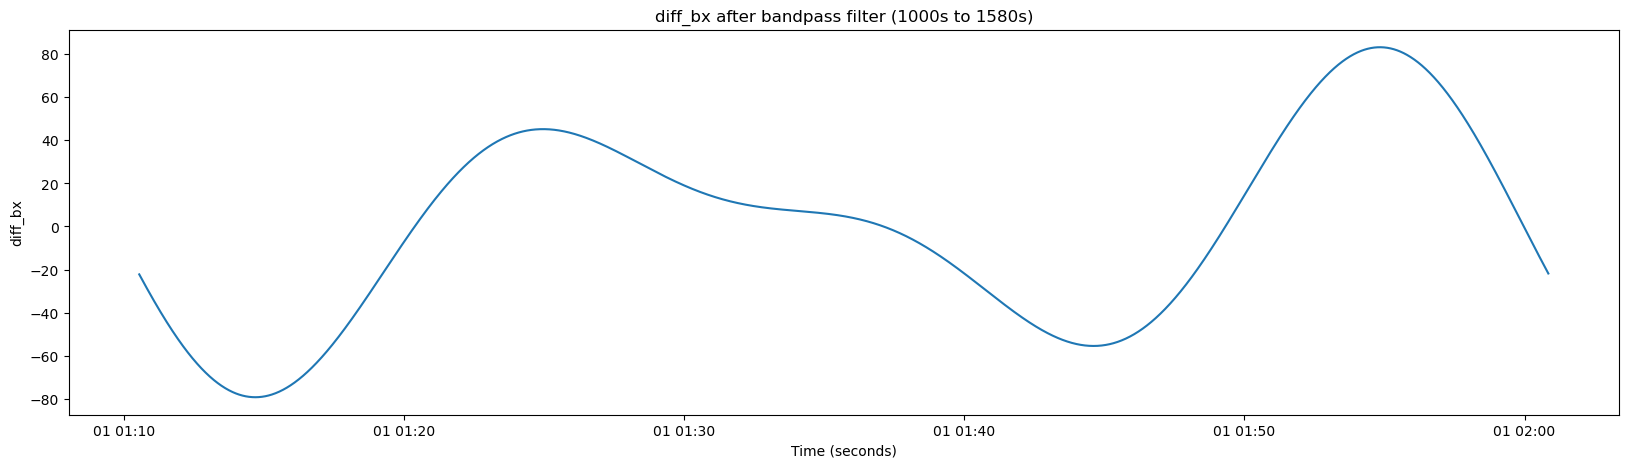

In [7]:
fig5,vx_filtered = filter_vx.signal_after_bandpass_filter(epoch1=1000,epoch2=1580,is_draw=True)
fig6,diff_bx_filtered = filter_diff_bx.signal_after_bandpass_filter(epoch1=1000,epoch2=1580,is_draw=True)

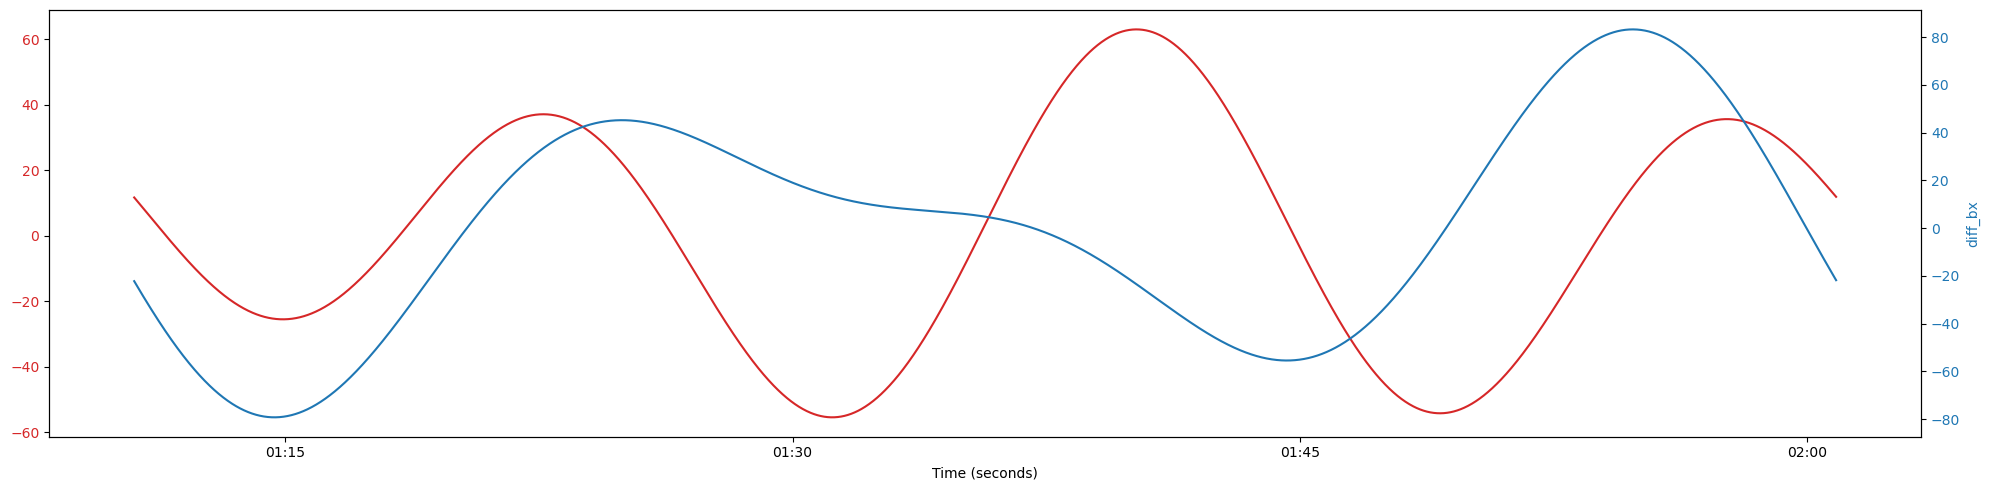

In [8]:
fig,ax1 = plt.subplots(figsize=(20,5))
# 绘制第一组数据，使用左侧y轴
color = 'tab:red'
ax1.set_xlabel('Time (seconds)')
ax1.plot(data['Epoch'], vx_filtered, color=color)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在12点和13点显示
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个坐标轴，共享同一个x轴
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('diff_bx', color=color)
ax2.plot(data['Epoch'], diff_bx_filtered, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 显示图形
fig.tight_layout()  # 可选，为了更好的布局
# fig.suptitle(f' after bandpass filter (s to s)')
plt.show()